**Checkout.com home challenge - Irit-Friedman-Hauser**

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

*Load classes defining preprocessing, data splitting, Class balancing, Model creation, Parameter tuning Automation, Hyperparameter Tuning, Automation, Utils, Visualizations and explorations from classes.py*


In [3]:
from classes import Preprocessor, DatasetSplitter, ClassBalancer, Model, WorkflowParameterTuner, HyperparameterTuner, Utils, Visualizations_and_explorations

# === Load Data ===

In [7]:
# Instantiate the Utils class and load the dataset as a pandas df 
ut = Utils()
df = ut.load_data(f"../data/card_transactions.csv")
print ("Input df", df.shape)

Input df (364342, 39)


# === Visualizations and explorations ===



Shape of dataset (df.shape):
 (364342, 39) 

First 5 rows of the dataFrame:
    payment_id  client_id    transaction_date  amount_usd card_scheme  fraud  \
0          17        384 2019-01-02 00:04:28      100.00  mastercard      0   
1          19        384 2019-01-02 00:05:30      186.00        visa      0   
2          27        688 2019-01-02 00:09:32       47.95        visa      0   
3          28        688 2019-01-02 00:09:33       20.00  mastercard      0   
4          29        695 2019-01-02 00:09:39       36.99        visa      0   

       mcc  transaction_lever  country_code  issue_bank_code  ...  \
0  finance                  3  country_87.0            150.0  ...   
1   retail                  1  country_87.0            150.0  ...   
2   retail                  3  country_87.0            150.0  ...   
3   retail                  2  country_87.0            150.0  ...   
4   retail                  2  country_87.0            150.0  ...   

  anomaly_score  mouse_hor_ver_

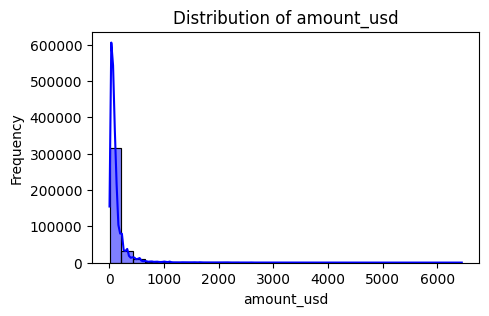

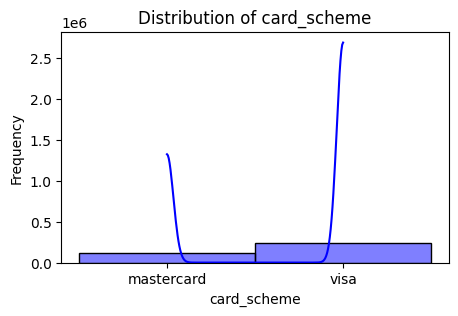

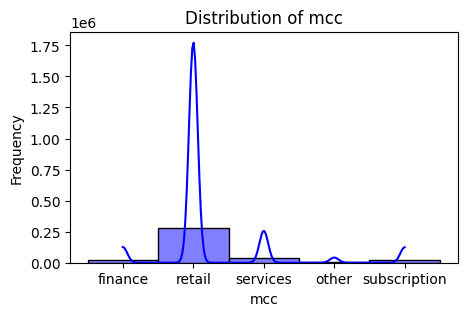

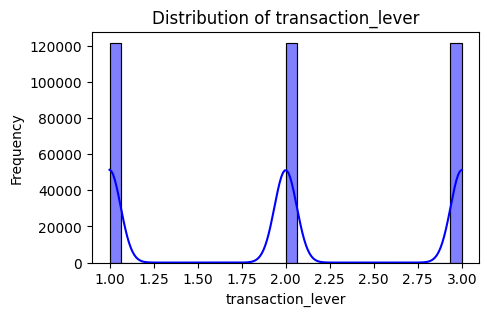

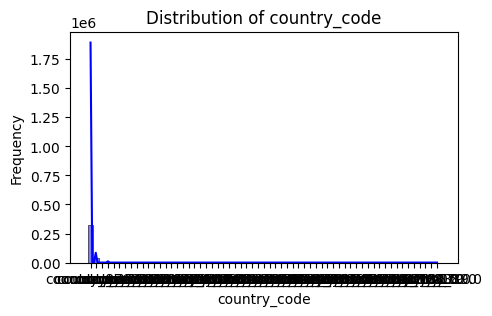

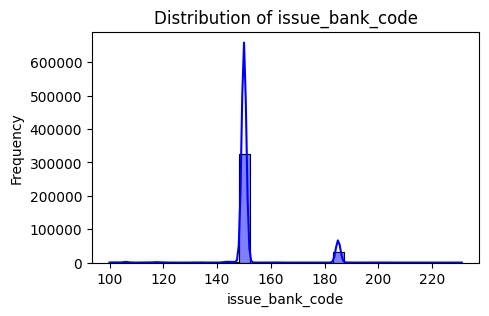

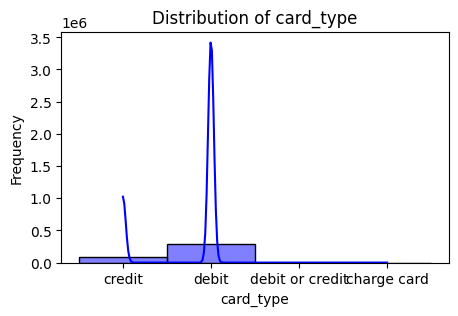

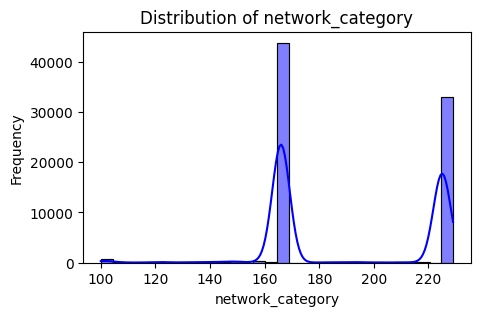

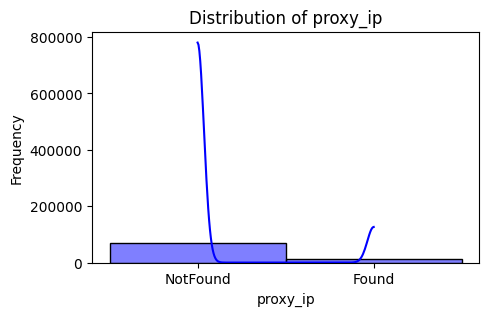

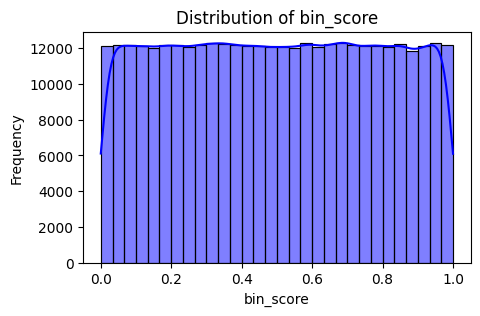

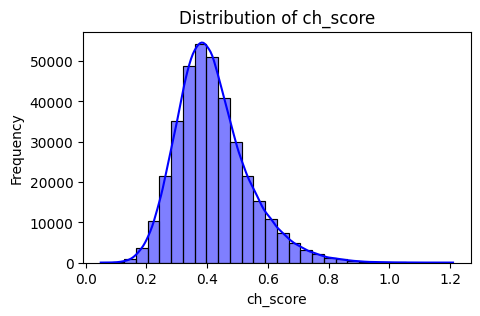

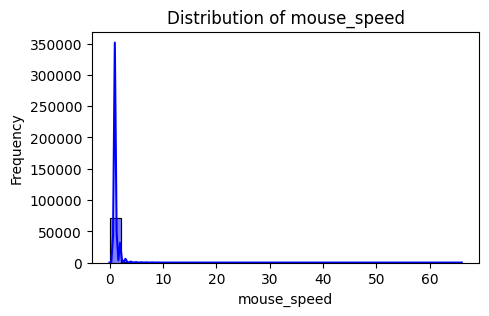

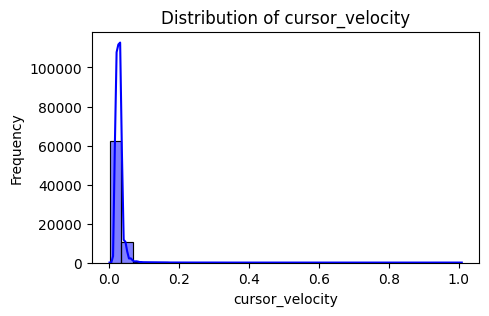

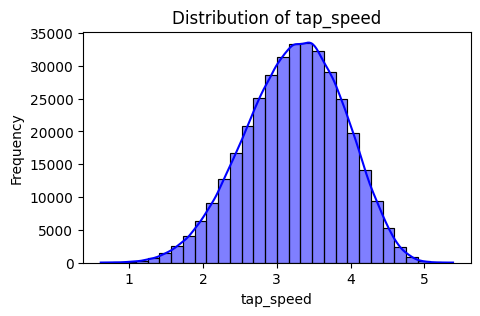

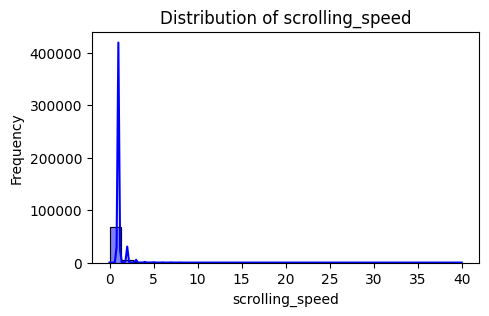

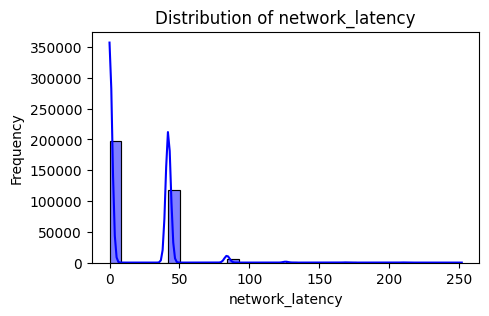

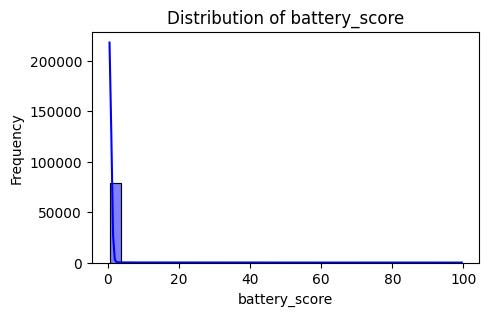

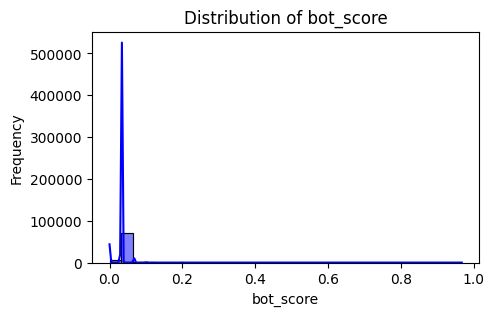

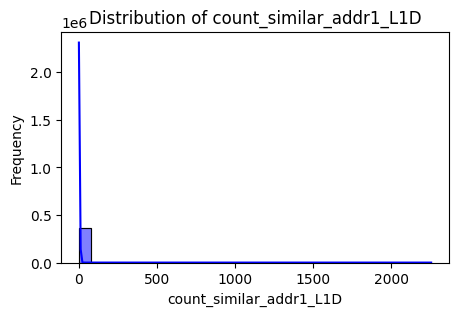

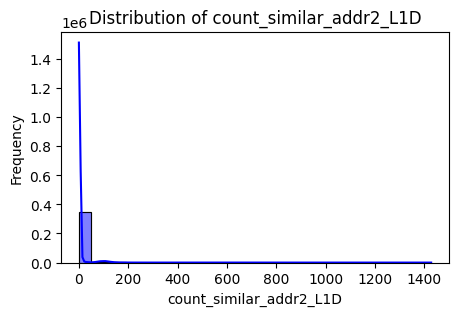

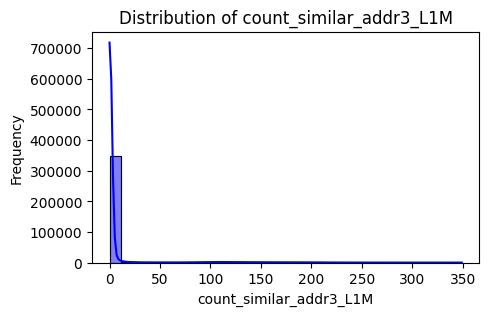

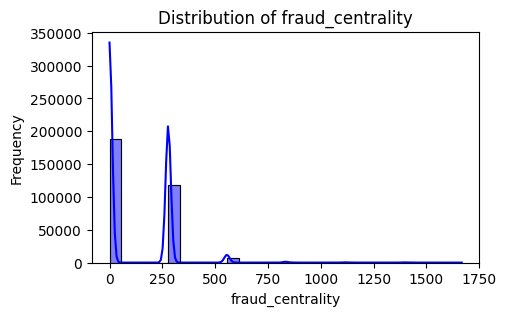

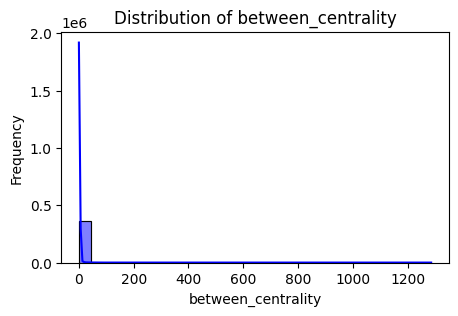

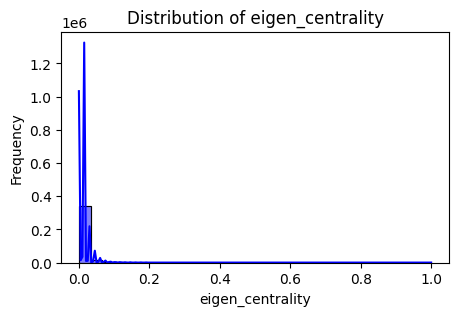

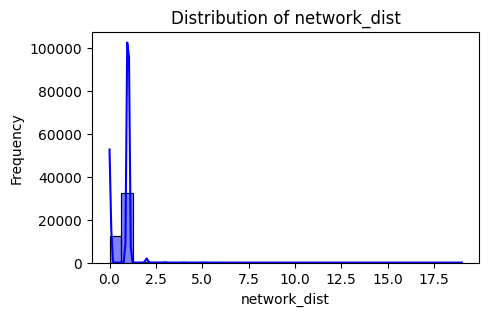

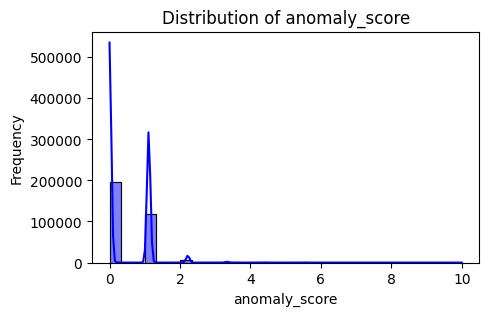

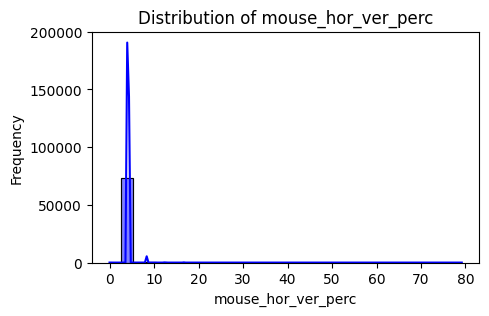

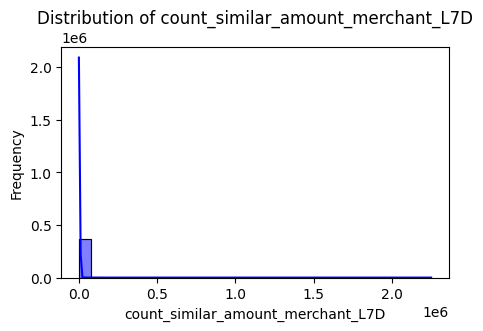

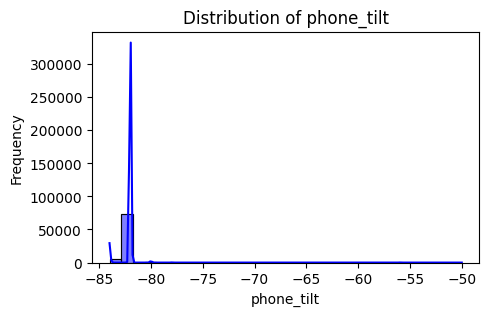

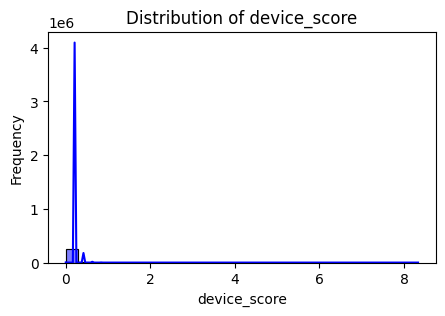

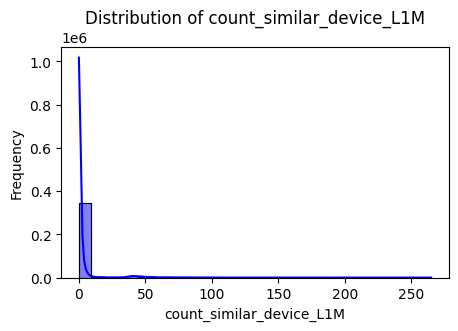

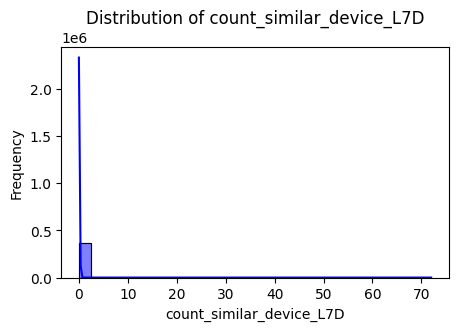

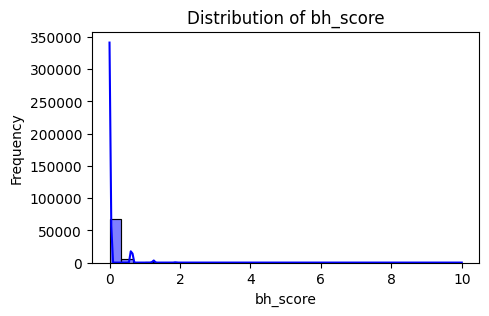

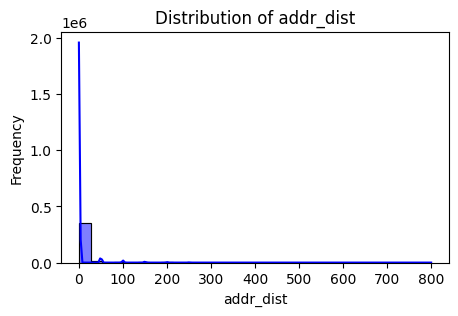

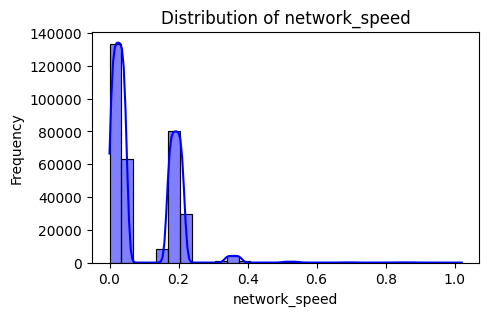

Distribution of y Variable



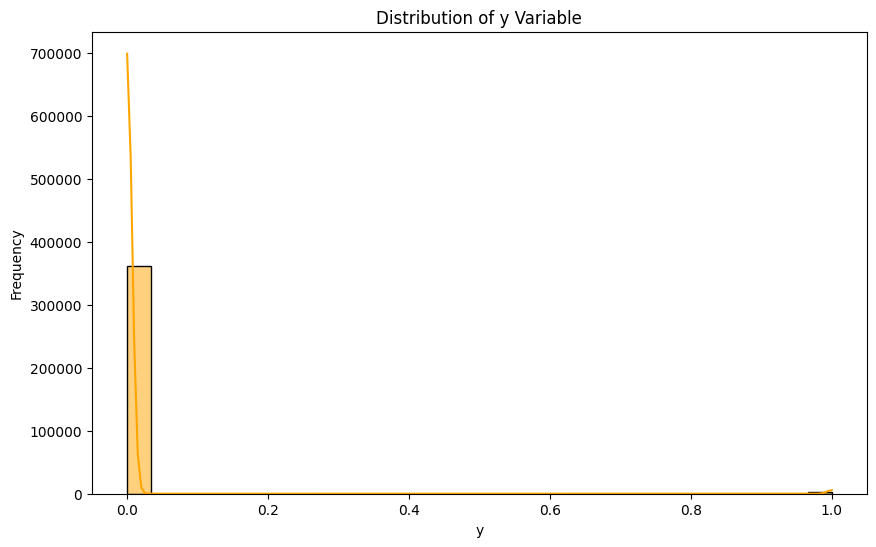

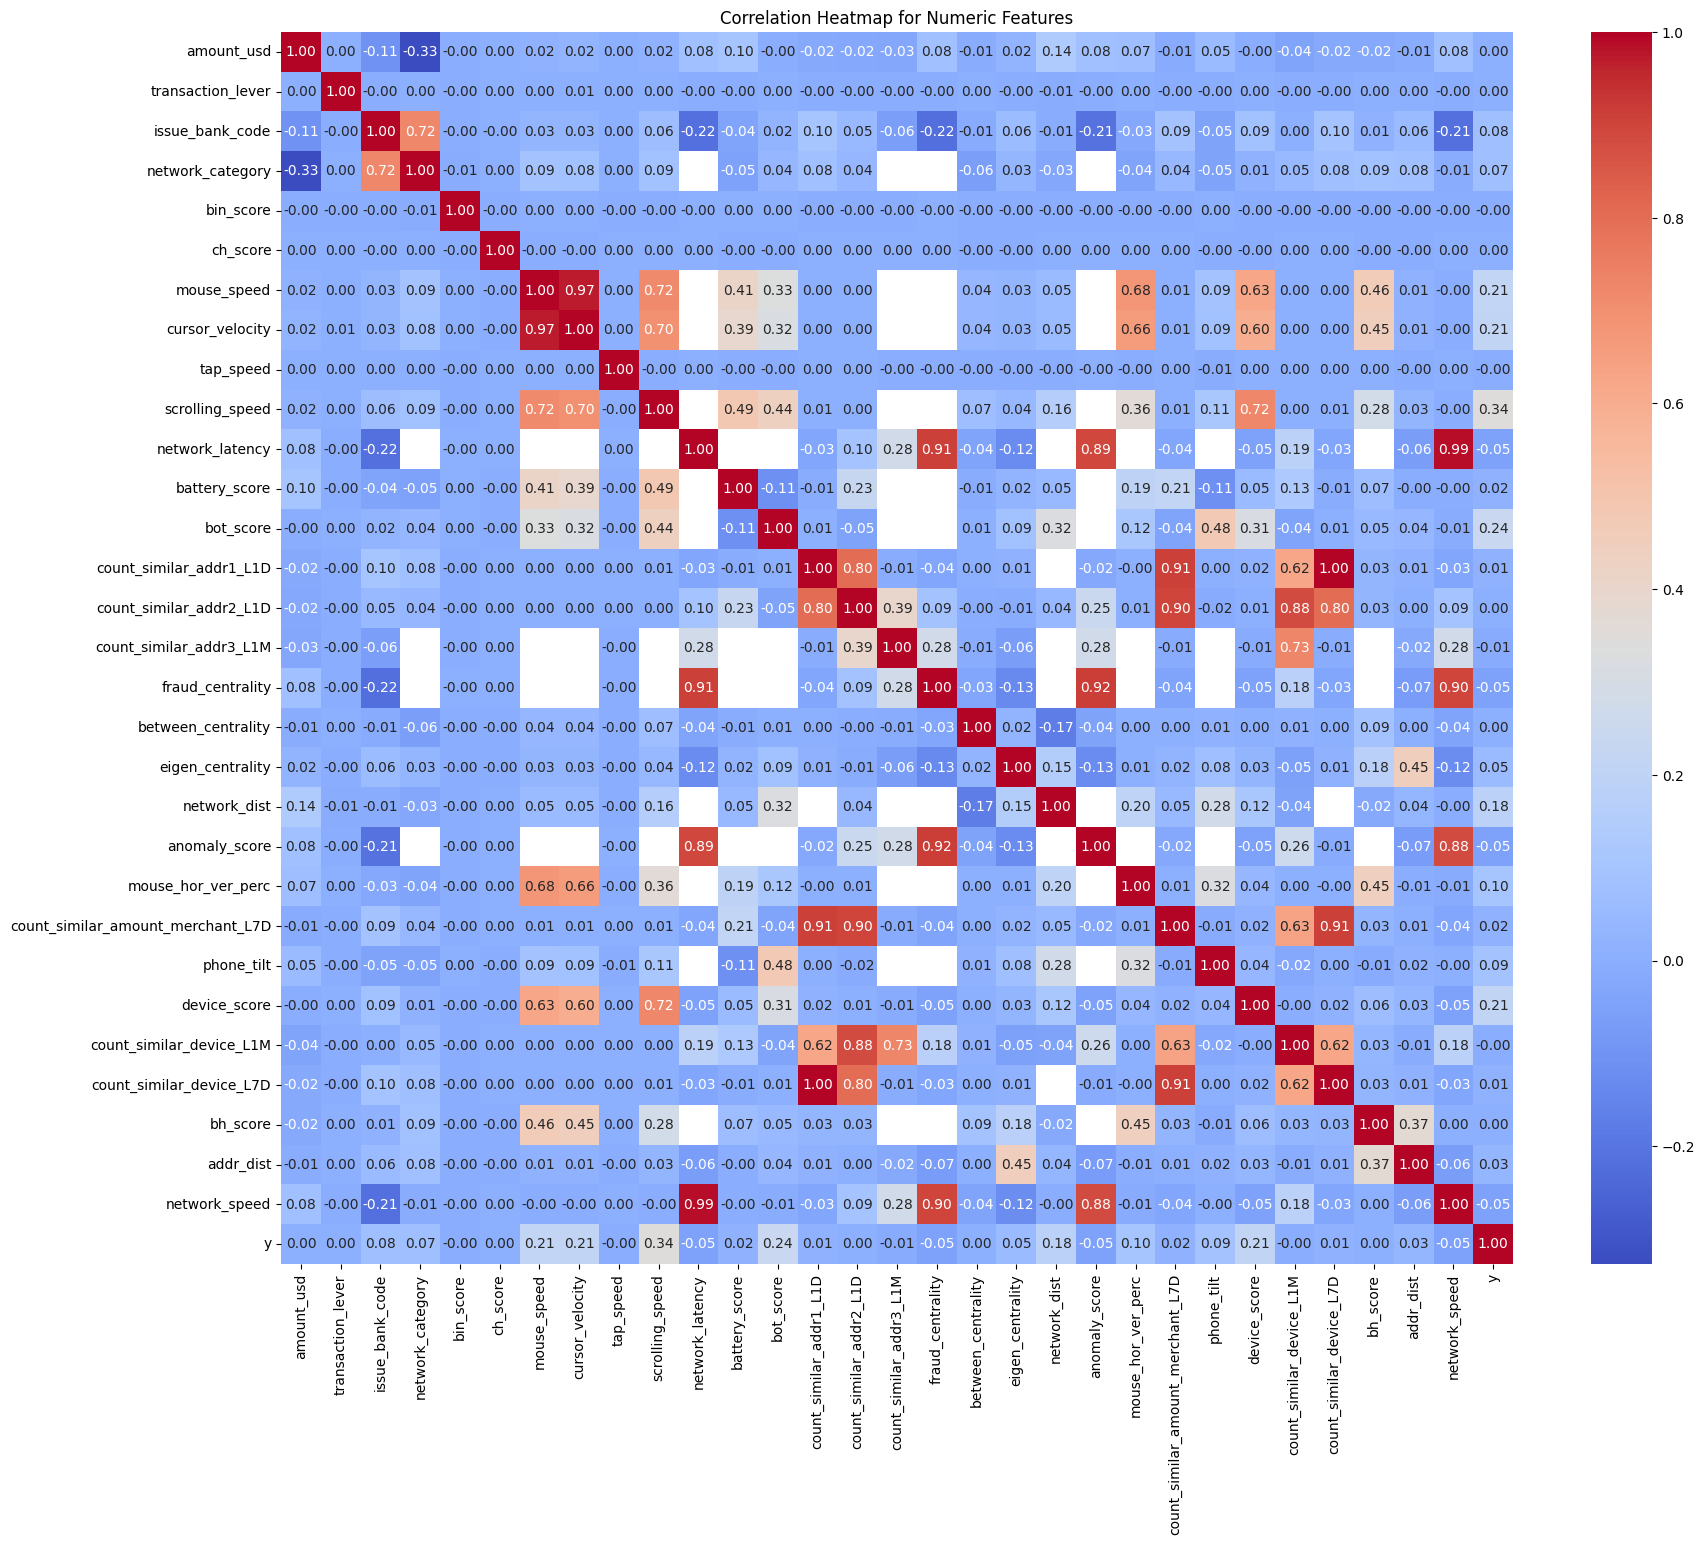

[DEBUG] Checking correlations above 0.9...
[WARNING] High-correlation pairs detected:
  mouse_speed and cursor_velocity: 0.97
  cursor_velocity and mouse_speed: 0.97
  network_latency and fraud_centrality: 0.91
  network_latency and network_speed: 0.99
  count_similar_addr1_L1D and count_similar_amount_merchant_L7D: 0.91
  count_similar_addr1_L1D and count_similar_device_L7D: 1.00
  count_similar_addr2_L1D and count_similar_amount_merchant_L7D: 0.90
  fraud_centrality and network_latency: 0.91
  fraud_centrality and anomaly_score: 0.92
  anomaly_score and fraud_centrality: 0.92
  count_similar_amount_merchant_L7D and count_similar_addr1_L1D: 0.91
  count_similar_amount_merchant_L7D and count_similar_addr2_L1D: 0.90
  count_similar_amount_merchant_L7D and count_similar_device_L7D: 0.91
  count_similar_device_L7D and count_similar_addr1_L1D: 1.00
  count_similar_device_L7D and count_similar_amount_merchant_L7D: 0.91
  network_speed and network_latency: 0.99

Correlation of features with 

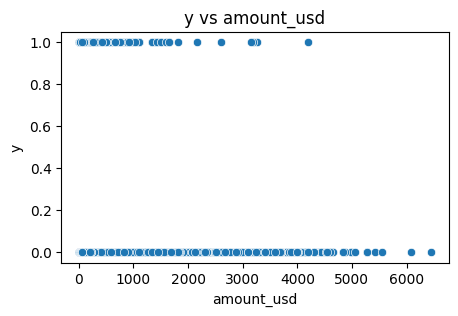

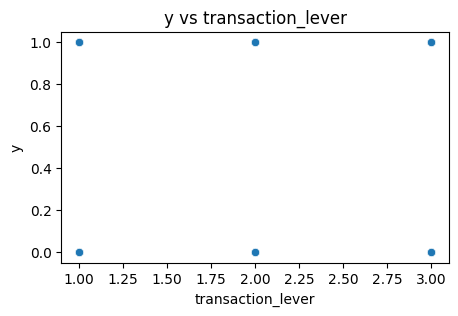

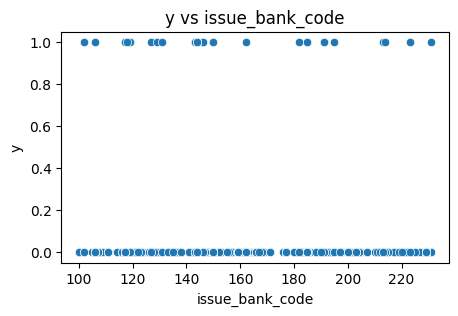

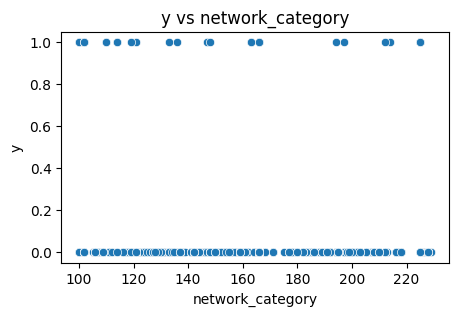

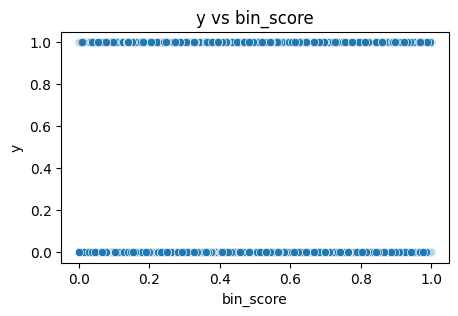

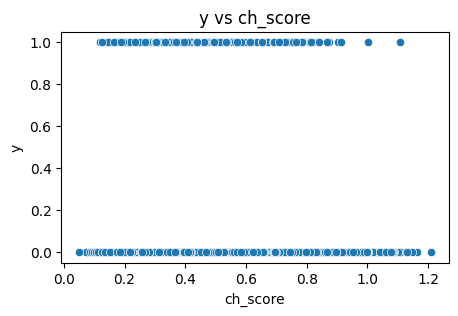

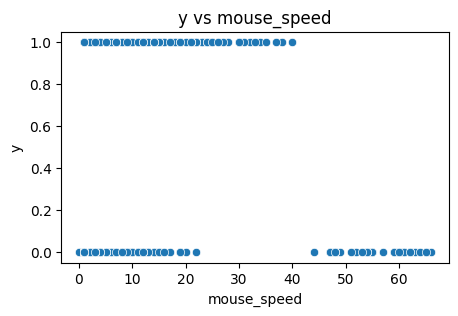

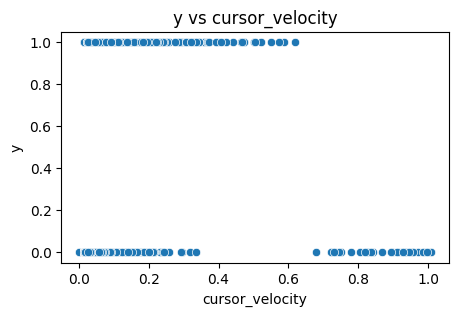

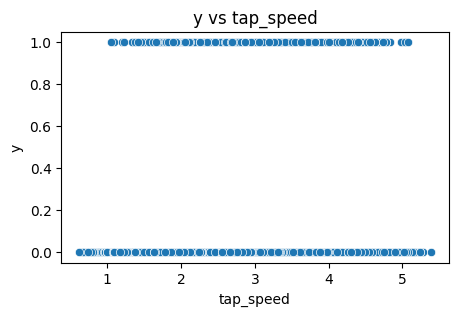

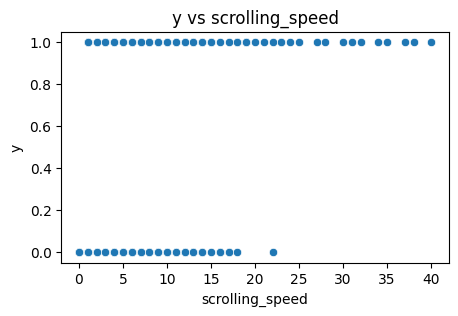

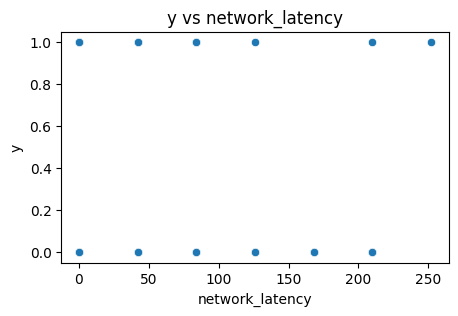

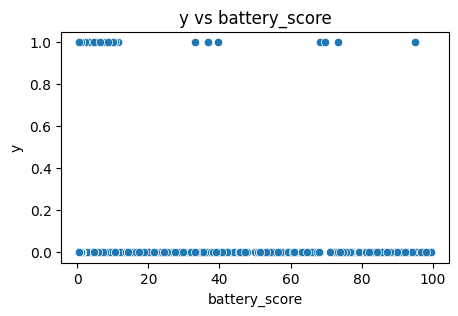

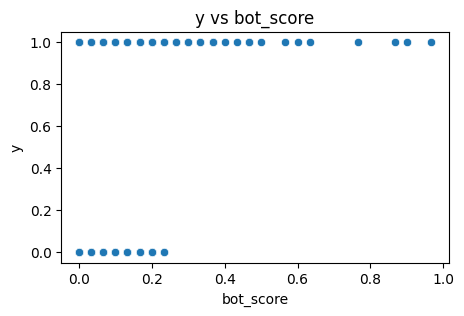

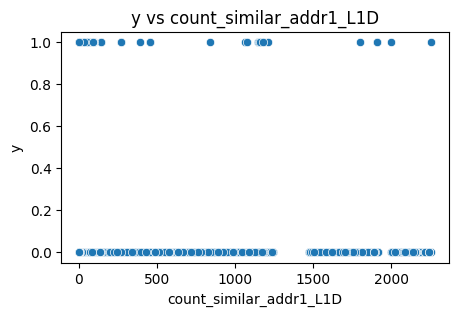

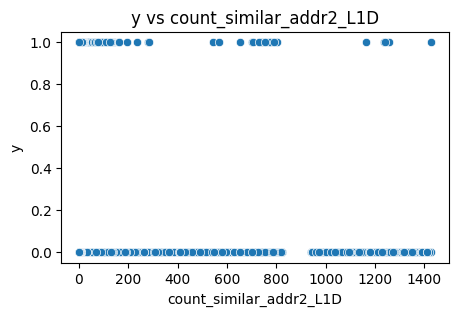

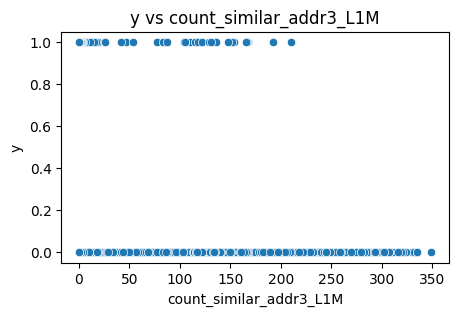

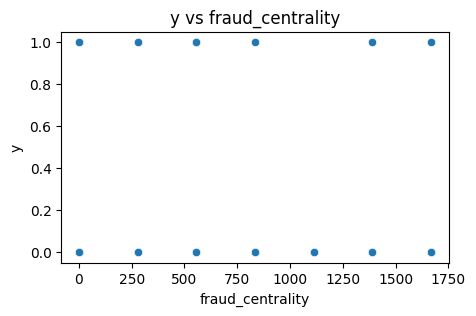

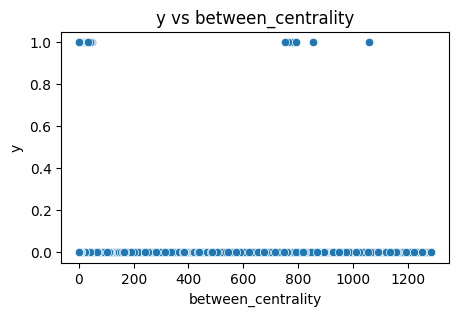

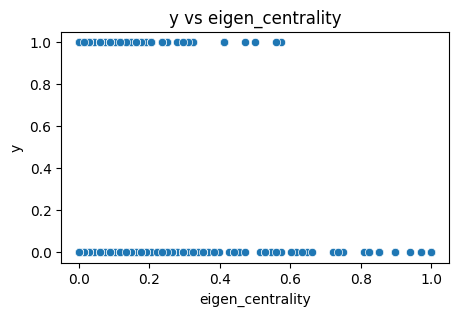

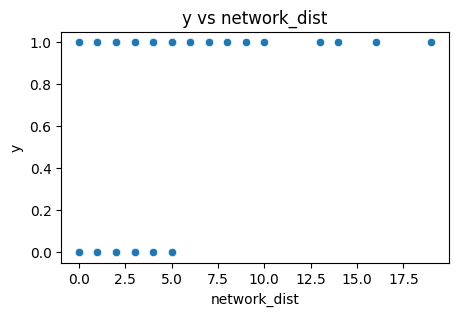

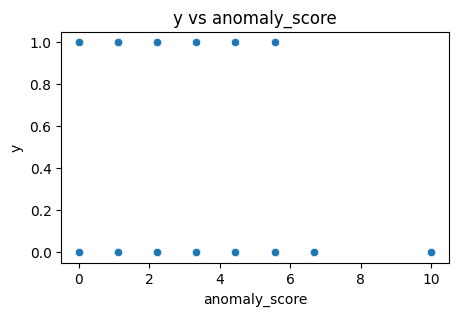

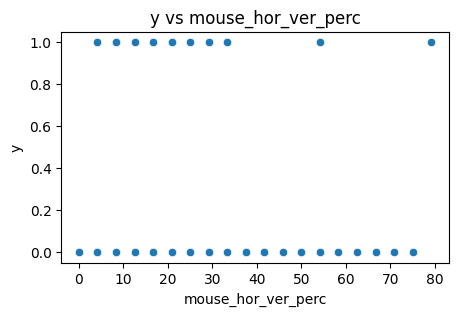

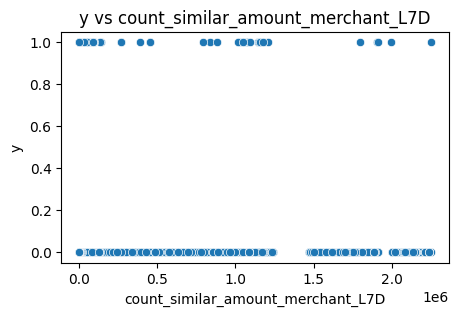

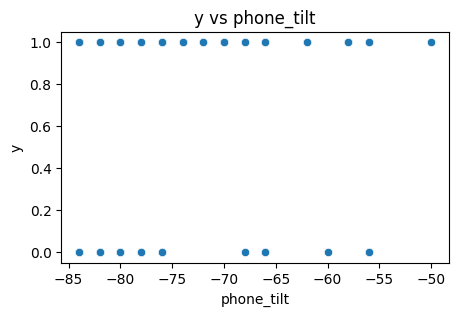

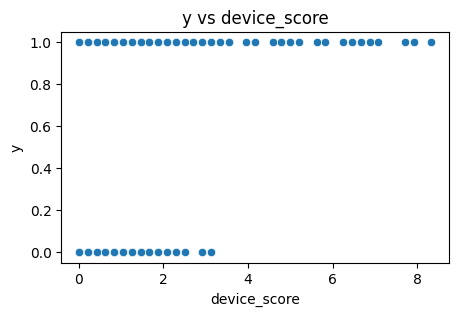

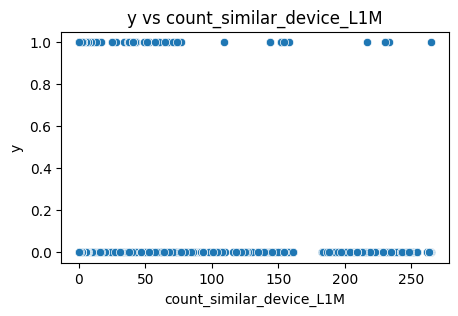

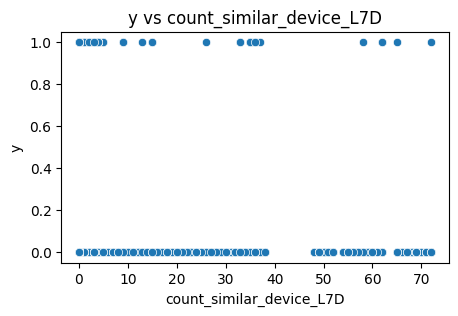

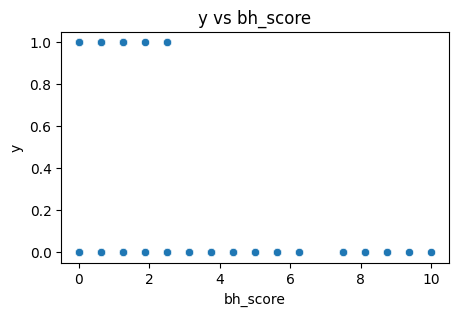

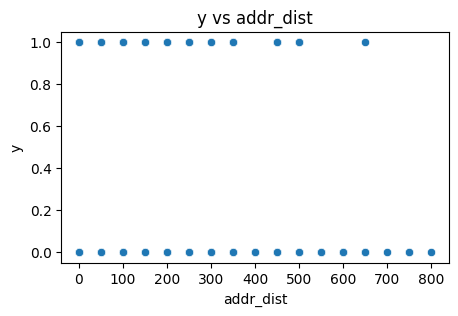

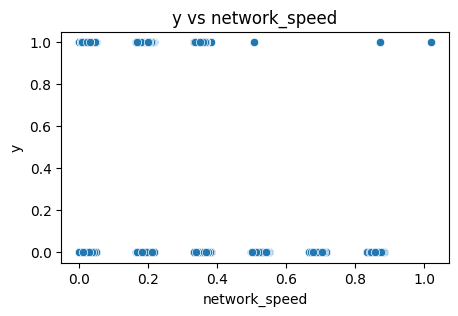

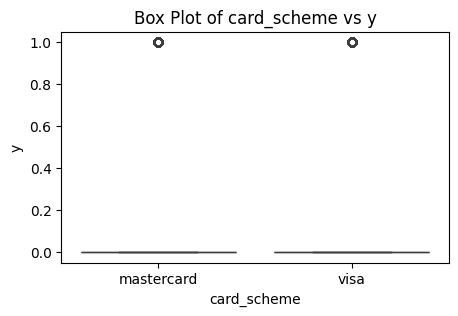

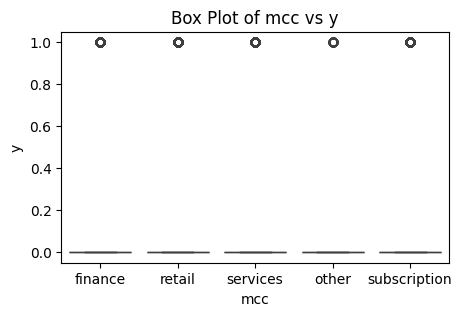

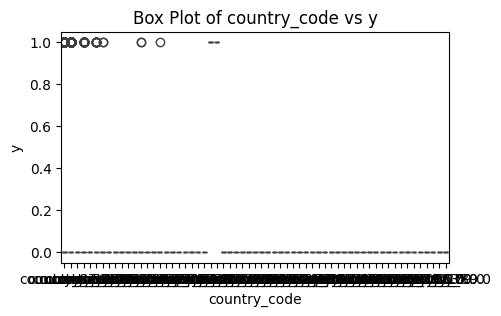

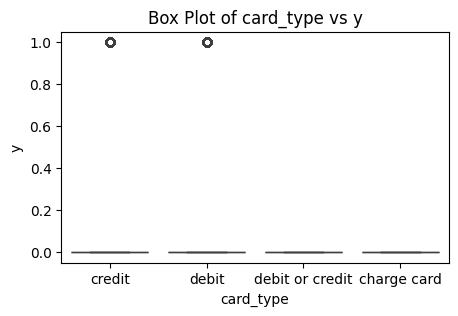

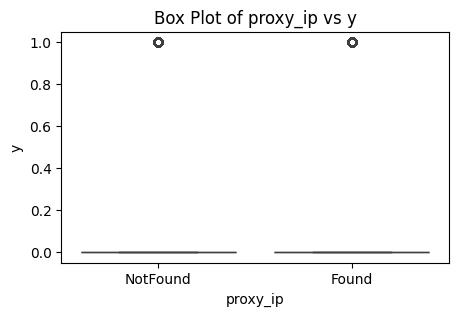

In [9]:
# Instantiate the Visualization class and run visualisations
viz = Visualizations_and_explorations(df, id_columns = ['payment_id', 'client_id', 'transaction_date'], datetime_columns = ['transaction_date'])
viz.run_explorations()

###  Dataset Analysis and conclusions from data exploration and visualization:
* The dataset is `highly imbalanced`, with only 0.8% of transactions labeled as fraud. This may require strategies like oversampling or undersampling.
* Several columns (e.g. **network_category**, **proxy_ip**, **mouse_speed**) have a `high percentage of missing values`, which might require imputation or feature engineering.
* Features like **mouse_speed**, **cursor_velocity** and **phone_tilt** have `low variability` or may introduce noise.
* Continuous features like **amount_usd**, **addr_dist** and **network_speed** have a wide range, which may requires `scaling/normalization` for algorithms sensitive to scale.
* `Feature Engineering Opportunities`: Temporal features from transaction_date, and categorical features like card_scheme or mcc could be expanded into derived features (e.g. day of the week etc.).
* There are no duplicate rows
* None of the columns containss a single value

### **Correlations Between Features and tatget**:
- None of the features is highly correlated with the target feature
- Few features like `cursor_velocity` , `network_speed`, `mouse_speed`, `scrolling_speed` or `device_score` have some correlation with the target feature
- Some features have very low correlation with the target variable and may have low impact on model results.

### **Correlations Between Features**:
   - `Positive Correlation`:
     - Features `count_similar_addr1_L1D & count_similar_device_L7D`, `network_latency & network_speed` and `mouse_speed & cursor_velocity` highly correlate between themselves

### **Features Distributions**:
   - **Skewed Distribution**:
     - Many features like : `mouse_speed`, `cursor_velocity`, `count_similar_addr1_L1D`, `between_centrality`, `mouse_hor_ver_perc`, `count_similar_amount_merchant_L7D`, `device_score`, `count_similar_device_L7D` are right-skewed (have a tail on the right side).
     - The target variable is also very skewed with the positive class account for only 0.8% of all transactions.
   - **Outliers**:
     - `ch_score`, `mcc` and `proxy_ip` have `more uniform distributions` with some `right skewness` for extreme values which could be `outliers`. This may need further investigation or handling during preprocessing, as it could affect model performance.


# === Workflow Execution ===
**Execute a full workflow of preprocessing, data splitting, Class balancing, XGBoost Model creation and Hyperparameter Tuning using GridSearchCV**




[DEBUG] Starting full preprocessing pipeline execution...
[DEBUG] Imputation applied.
[DEBUG] Scaling skipped as apply_scaling is False.
[DEBUG] Applying Label Encoding to card_scheme...
[DEBUG] Applying Label Encoding to mcc...
[DEBUG] Applying Label Encoding to country_code...
[DEBUG] Applying Label Encoding to card_type...
[DEBUG] Applying Label Encoding to proxy_ip...
[DEBUG] Low variance removal skipped as low_variance_threshold is 0.0.


[DEBUG] Removing correlated features with correlation higher than 0.99...: ['count_similar_device_L7D']
[DEBUG] Outlier removal skipped as outlier_threshold is 0.0.
[DEBUG] Skew handling skipped as skew_threshold is 0.0.
[DEBUG] skewed y transformation skipped as transform_skewed_y is False.
[DEBUG] Extracting datetime features for column: transaction_date
[DEBUG] Preprocessing complete!




[DEBUG] Train size: 254746, Test size: 109596
[DEBUG] Test set contains 101118 unique client_ids.
[DEBUG] Test starts at month: 5
Train Features shape:
 (2

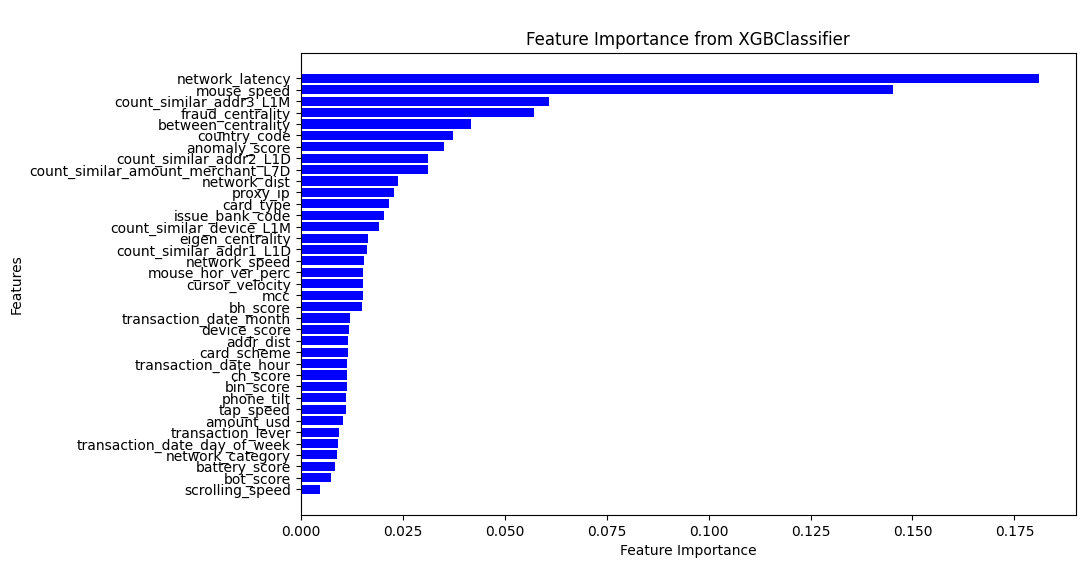

Hyperparameters of best XGBClassifier
objective: binary:logistic
base_score: None
booster: None
callbacks: None
colsample_bylevel: None
colsample_bynode: None
colsample_bytree: 0.7
device: None
early_stopping_rounds: None
enable_categorical: False
eval_metric: logloss
feature_types: None
gamma: None
grow_policy: None
importance_type: None
interaction_constraints: None
learning_rate: 0.1
max_bin: None
max_cat_threshold: None
max_cat_to_onehot: None
max_delta_step: None
max_depth: 20
max_leaves: None
min_child_weight: None
missing: nan
monotone_constraints: None
multi_strategy: None
n_estimators: 400
n_jobs: -1
num_parallel_tree: None
random_state: 42
reg_alpha: None
reg_lambda: None
sampling_method: None
scale_pos_weight: 120.48116356700048
subsample: 0.7
tree_method: None
validate_parameters: None
verbosity: None
min_samples_leaf: 1
min_samples_split: 2
use_label_encoder: False


In [10]:
def run_pipeline():
    """ Find and train the best model and evaluate performance """    
    # Step 1: Preprocess Data using Preprocessor    
    # Create the Preprocessor instance
    preprocessor = Preprocessor(df = df, 
                      target = 'fraud',    
                      id_columns = ['payment_id', 'client_id'],
                      datetime_columns=['transaction_date'],
                      skew_threshold=0.0,
                      apply_scaling=False,
                      scaling_method='standard',
                      apply_imputation=True,  
                      imputer_strategy='most_frequent',
                      correlation_threshold=0.99,
                      outlier_threshold=0,
                      low_variance_threshold=0,
                      transform_skewed_y=False,
                      categorical_encoding='label')

    # Execute the full preprocessing pipeline on all the data
    X_preprocessed, y_preprocessed = preprocessor.execute_preprocessing_pipeline()
    
    # Step 2: Split Data into Train/Test, avoiding oerlap of month & client_id
    # Create the DatasetSplitter instance
    splitter = DatasetSplitter(
        X=X_preprocessed,
        y=y_preprocessed,
        test_percentage=0.3
    )
    # Split the dataset
    X_train, X_test, y_train, y_test = splitter.split()
    
    # Display the resulting train and test sets
    print("Train Features shape:\n", X_train.shape)
    print("\nTrain Labels value_counts:\n", y_train.value_counts())
    print("\nTest Features shape:\n", X_test.shape)
    print("\nTest Labels value_counts:\n", y_test.value_counts())
    
    # Step 3: Resample Train Set using ClassBalancer - Up-sampling or Down-sampling
    # Create the ClassBalancer instance    
    resampler = ClassBalancer(method='upsample', target_ratio=1.0)
    # Resample
    X_train_resampled, y_train_resampled = resampler.balance(X_train, y_train)

    # Display the resulting train and test sets
    print("Train Features shape after resample:\n", X_train_resampled.shape)
    print("\nTrain Labels shape after resample:\n", y_train_resampled.shape)
    print("\nTrain Labels value_counts after resample:\n", y_train_resampled.value_counts())
    
    # Step 4: Train and Evaluate Classifier, and Optimize Hyperparameters   
    # Calculate scale_pos_weight
    num_negatives = (y_train_resampled == 0).sum()
    num_positives = (y_train_resampled == 1).sum()
    scale_pos_weight = num_negatives / num_positives
    print(f"scale_pos_weight: {scale_pos_weight}")
    
    # Define the hyperparameter ranges for XGBoost
    xgb_param_ranges = {
         'scale_pos_weight': [scale_pos_weight], # Handle class imbalance
         'n_estimators': [300, 350, 400],  # number of trees in the foreset 
         'max_depth': [None, 20], #  max number of levels in each tree
         'learning_rate': [0.1, 0.2], # Step size the optimizer makes updates to the weights.
         'subsample': [0.7, 0.8], # Fraction of observations used for each tree
         'colsample_bytree': [0.7, 0.8], # Fraction of features used for each tree
         'min_samples_split': [2, 3], # min number of X points placed in a node before the node is split
         'min_samples_leaf': [1, 2], # min number of X points allowed in a leaf node
         'use_label_encoder': [False],                # Avoid label encoding warnings
         'eval_metric': ['logloss'],                  # Suitable for binary classification
         'random_state': [42],
         'n_jobs': [-1]
    }    

    # Initialize the HyperparameterTuner 
    param_tuner = HyperparameterTuner(
            model_class=XGBClassifier,
            X_train=X_train_resampled,
            y_train=y_train_resampled,
            param_ranges=xgb_param_ranges
    )   
    
    # Tune Hyperparameter using GridSearchCV and create  XGBClassifier best model instance
    best_model_xgb, best_trained_model_xgb, feature_importances_xgb, predictions_xgb = param_tuner.best_model_instance(X_test, y_test)

# Run the pipeline 
run_pipeline()

# === Pipeline Automation
**Automation of feature engineering, parameter and hyperparamete tuning and model selection, producing the best model with the best score**

In [12]:
def run_pipeline_with_tuning():
    """
    The pipeline automates data preprocessing, imbalanced classes handling, performance optimization using parameter/hyperparameter tuning and model selection. 
    """
    # Choose ROC-AUC as the scoring metric. Can choose other metrics as well
    scoring='roc_auc' 
    
    # Step 1: Load Data
    ut = Utils()
    df = ut.load_data(f"../data/card_transactions.csv")
    print ("Input df", df.shape)

    # Step 2: Define parameter ranges
    preprocessor_param_ranges = {
        'skew_threshold': [0, 15],
        'apply_scaling': [False, True], 
        'scaling_method': ['standard', 'minmax'],
        'apply_imputation': [True, False],
        'imputer_strategy': ['most_frequent', 'mean', 'median'],
        'correlation_threshold': [0.99, 0.95, 0],
        'outlier_threshold': [0, 1.5],
        'low_variance_threshold': [0, 0.01],
        'transform_skewed_y': [False, True],
        'categorical_encoding': ['label', 'onehot']
    }

   
    class_balancer_param_ranges = {
        'method': ['passthrough', 'upsample', 'downsample'],
        'target_ratio': [0.5, 1.0]
    }
    
    model_param_ranges = {
        'n_estimators': [350, 400],  # number of trees in the foreset
        'max_depth': [None, 20], #  max number of levels in each  tree, If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
        'min_samples_split': [3, 4], # min number of X points placed in a node before the node is split
        'min_samples_leaf': [2, 3], # min number of X points allowed in a leaf node
        'class_weight': ['balanced'],  # Automatically balance class weights
        'random_state': [42],
        'n_jobs': [-1],        
    }
    
    # Step 3: Instantiate and run hyperparameter tuner checking RandomForestClassifier and XGBClassifier
    pipeline = WorkflowParameterTuner(
        preprocessor_param_ranges=preprocessor_param_ranges,
        class_balancer_param_ranges=class_balancer_param_ranges,
        model_param_ranges=model_param_ranges,
        model_classes=[RandomForestClassifier, XGBClassifier],
        test_percentage=0.3,
        scoring=scoring
    )

    # Step 4: Get the best model and parameters
    best_params, best_score, best_model, trained_model = pipeline.tune(df=df)

    print(f"Best {scoring} Score: {best_score:.4f}")
    print(f"Best Parameters: {best_params}")

    return best_params, best_score, best_model, trained_model

# Run the automated process
best_params, best_score, best_model, trained_model = run_pipeline_with_tuning()

Input df (364342, 39)


[DEBUG] Starting full preprocessing pipeline execution...
[DEBUG] Imputation applied.
[DEBUG] Scaling skipped as apply_scaling is False.
[DEBUG] Applying Label Encoding to card_scheme...
[DEBUG] Applying Label Encoding to mcc...
[DEBUG] Applying Label Encoding to country_code...
[DEBUG] Applying Label Encoding to card_type...
[DEBUG] Applying Label Encoding to proxy_ip...
[DEBUG] Low variance removal skipped as low_variance_threshold is 0.0.


[DEBUG] Removing correlated features with correlation higher than 0.99...: ['count_similar_device_L7D']
[DEBUG] Outlier removal skipped as outlier_threshold is 0.0.
[DEBUG] Skew handling skipped as skew_threshold is 0.0.
[DEBUG] skewed y transformation skipped as transform_skewed_y is False.
[DEBUG] Extracting datetime features for column: transaction_date
[DEBUG] Preprocessing complete!




[DEBUG] Train size: 254746, Test size: 109596
[DEBUG] Test set contains 101118 unique client_ids.
[DEBUG] Test starts at month: 5


[

# === Conclusions and Results from automated pipeline ===
## **Preprocessing**
The preprocessing pipeline, implemented by the `Preprocessor` class, addresses several data preparation tasks:
- **Tasks**: Investigate Scaling methods, Impute missing value strategies, Skewed features transformations, Categorical encoding methods, High correlations features dropping, Low-variance filtering, Outlier removal and Target variable transformations
- **Preprocessing Best Parameters:**
    - **Imputation:** Missing values in numerical features are filled using the `most_frequent` strategy. This ensures that models receive complete data.
    - **Categorical Encoding:** `LabelEncoder` is applied to encode categorical features numerically. 
    - **Feature Correlation:** Features with correlations above `0.99` are dropped to prevent multicollinearity, reducing overfitting risks.
    - **Disables unnecessary transformations** e.g., scale continuous variable, skew handling,  outlier removal and low-variance filtering, retaining raw feature characteristics, aligning with the selected model's compatibility.

---

## **Train/Test Split**
- **Split data**: Into training, and testing sets ensuring no data leakage of clients and months. 
Test months are selected as the latest months (out-of-time split).

---

## **Class Balancing**
- **Class balancing Best Parameters:**
The pipeline tested Upscaling and Downscaling methods, ultimately using the `passthrough` option, meaning no additional balancing was applied.
Class balancing was addressed using the classifier hyperparameters and due to the robustness of the selected classifier.

---

## **Model Selection**
- **Compared:** `RandomForestClassifier` and `XGBClassifier`
- **Best Model:**
The pipeline choosed the`RandomForestClassifier` as the best model, which is well-suited for tabular data and capable of handling class imbalances (using `class_weight='balanced'`).
The model's tree-based structure allows it to operate effectively on unscaled data and exploit complex feature interactions.
- **Best Key Hyperparameters:**
    - `n_estimators=350`:  increases the ensemble's robustness and reduces the variance.
    - `max_depth=None`: Not restricting the depth ensures the model captures nuances of minority class.
    - `min_samples_split=3`: Reduces the likelihood of creating splits that focus too heavily on the majority class and consider splits that might better represent the minority class.
    - `min__samples_leaf=2`: Prevents splits that are overly specific to the majority class, improving generalization for the minority class.
    - `class_weight='balanced'`: Adjusts weights inversely proportional to class frequencies, ensures the minority class is given higher importance, to address class imbalance.
---
## **Model Evaluation**
Model evaluation relies on multiple metrics, focusing on **ROC-AUC** due to the imbalanced nature of the dataset. The score metric is a parameter and can be adjusted.

**Why ROC-AUC?**
- **Class Imbalance:** Unlike accuracy, ROC-AUC focuses on the model's ability to distinguish between classes without being biased by the imbalance.
- **Threshold Agnostic:** It evaluates performance across all possible thresholds, ensuring robust results.

**Best Model Performance**
- **ROC-AUC Score:** `0.8275`, indicates good discrimination between fraudulent and non-fraudulent transactions.


### **ROC Curve of the best model**


[INFO] Evaluating classifier...
ROC AUC Score: 0.8275
PR-AUC: 0.2188160987390347



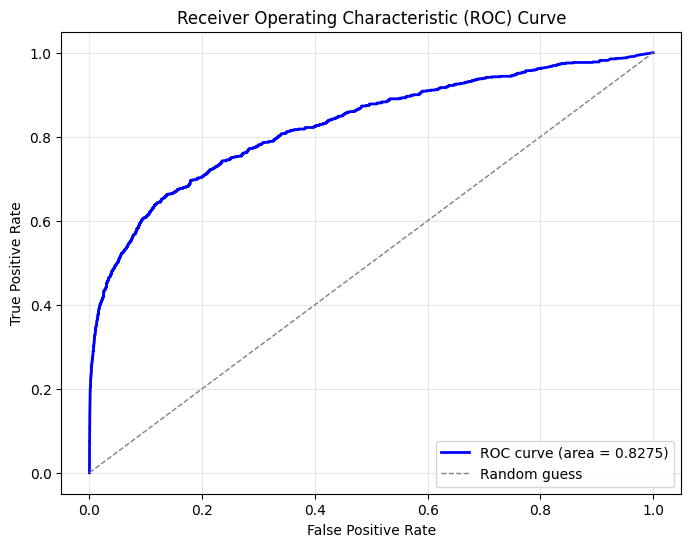

In [46]:
y_pred       = trained_model.predict(X_test)
y_pred_proba = trained_model.predict_proba(X_test)[:, 1]
predictions  = best_model.eval_report(y_pred, y_pred_proba, y_test, Plot_ROC_curve = True)


### **Classification Report and Confusion Matrix of the best model**


In [90]:
predictions = best_model.eval_report(y_pred, y_pred_proba, y_test, Plot_ROC_curve = False, print_Classification_Report = True)


[INFO] Evaluating classifier...
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    108776
           1       0.62      0.14      0.23       820

    accuracy                           0.99    109596
   macro avg       0.81      0.57      0.61    109596
weighted avg       0.99      0.99      0.99    109596

Confusion Matrix:
 [[108706     70]
 [   704    116]]
ROC AUC Score: 0.8275


### **Feature Importance of the best model**


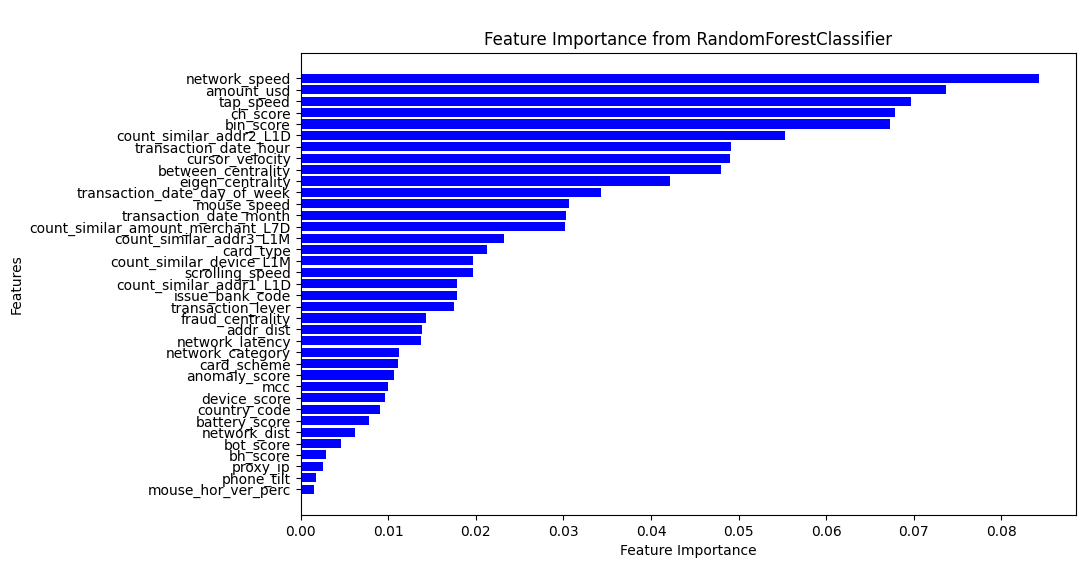

In [100]:
importance_df = best_model.plot_feature_importance() #### Best RandomForest

# === Summary ===
### **Key Features:**
  - Structured and iterative approach to address imbalanced classification problems
  - Emphasize on preprocessing flexibility, robust modeling, and comprehensive performance evaluation tailored to data characteristics.
  - Optimize and automate feature extraction, preprocessing, class balancer, parameter/hyperparameters tuning and model selection using a grid search with `roc_auc` as the scoring metric. 
  - Modular code structure for easy integration and updates.

### **Insights:**
  - **Feature Engineering:** Minimal transformations were applied, preserving the raw data's integrity and avoiding unnecessary complexity.
  - **Imbalance Handling:** Class balancing was addressed using `class_weight='balanced'`in the classifier hyperparameters.
  - **ROC-AUC Selection:** ROC-AUC effectively evaluated the model's ability to handle imbalanced data.
  - **Model Performance:** Achieved a ROC-AUC of `0.8275` which demonstrates good performance, especially considering the data's imbalance.
  - **RandomForest** proved to be the best classifier for predicting fraud, providing the highest ROC-AUC. Its robustness, ability to handle missing values, and compatibility with unscaled data contributed significantly to the pipeline's success.

# === Next Steps ===
  - Further model improvement could involve:
    - Experiment additional models and balancing techniques.
    - Incorporate advanced anomaly detection methods, such as isolation forest, for unsupervised fraud detection.
    - Use SHAP for interpreting model predictions.
  